In [1]:
from filemind.preprocessing import  Preprocessor

## Recupération des fichiers

In [2]:
# récupération de la liste des fichiers d'un recupère et de leur contexte

pathdir = "/home/mbe/Downloads"
preprocessor = Preprocessor(path_dir=pathdir, deep=True)

In [3]:
files, n = preprocessor.getFiles()

Error processing file /home/mbe/Downloads/logoipsum-343.svg: cannot identify image file '/home/mbe/Downloads/logoipsum-343.svg'
Error processing file /home/mbe/Downloads/Telegram Desktop/IMG_20240826_122303_978.jpg: 'PsdImageFile' object has no attribute '_getexif'


In [4]:
for i in range(n):
    print(files[i])
    print("\n")

{'file_path': '/home/mbe/Downloads/application-114be508-44a4-417d-b681-3c76b0884c4b.apk', 'metadata': {'fileCreatedAt': 1738260940709826223, 'fileUpdatedAt': 1738260937442781585, 'fileAccessedAt': 1738261112235078956, 'fileSize': 71400215, 'fileType': None}}


{'file_path': '/home/mbe/Downloads/falsh.jpg', 'metadata': {'fileCreatedAt': 1739199951317027602, 'fileUpdatedAt': 1739199951317027602, 'fileAccessedAt': 1741696121336040326, 'fileSize': 5288, 'fileType': 'image'}}


{'file_path': '/home/mbe/Downloads/9075.jpg', 'metadata': {'fileCreatedAt': 1734624323685099240, 'fileUpdatedAt': 1734624323669098405, 'fileAccessedAt': 1741696121376040920, 'fileSize': 642553, 'fileType': 'image'}}


{'file_path': '/home/mbe/Downloads/icons8-user-100.png', 'metadata': {'fileCreatedAt': 1734856687510930798, 'fileUpdatedAt': 1734856687315929764, 'fileAccessedAt': 1741696121424041634, 'fileSize': 2302, 'fileType': 'image'}}


{'file_path': '/home/mbe/Downloads/470c2c6d-5021-4605-8dfc-899dad3a8ee2.pdf',

## Pretraitement des fichiers

In [5]:
# recupération des métadonnées des fichiers
metadatas = [{**file["metadata"]} for file in files]

In [6]:
metadatas[0]

{'fileCreatedAt': 1738260940709826223,
 'fileUpdatedAt': 1738260937442781585,
 'fileAccessedAt': 1738261112235078956,
 'fileSize': 71400215,
 'fileType': None}

In [7]:
from pandas import DataFrame, notnull

df = DataFrame(metadatas)

In [8]:
df.shape

(404, 36)

In [9]:
df.head()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,fileType,title,author,creator,producer,subject,...,FPS,Frame_count,Scan_type,Language,ImageWidth,ImageLength,BitsPerSample,Software,DateTime,ImageDescription
0,1738260940709826223,1738260937442781585,1738261112235078956,71400215,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1739199951317027602,1739199951317027602,1741696121336040326,5288,image,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1734624323685099240,1734624323669098405,1741696121376040920,642553,image,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1734856687510930798,1734856687315929764,1741696121424041634,2302,image,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1737237836351859260,1737237822206231487,1741696121479042451,282638,document,None,None,wkhtmltopdf 0.12.6,Qt 5.15.13,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# remplacer les valeurs non numérique par None
df = df.where(notnull(df), None)

In [11]:
df.head()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,fileType,title,author,creator,producer,subject,...,FPS,Frame_count,Scan_type,Language,ImageWidth,ImageLength,BitsPerSample,Software,DateTime,ImageDescription
0,1738260940709826223,1738260937442781585,1738261112235078956,71400215,None,None,None,None,None,None,...,None,None,None,None,NaN,NaN,None,None,None,None
1,1739199951317027602,1739199951317027602,1741696121336040326,5288,image,None,None,None,None,None,...,None,None,None,None,NaN,NaN,None,None,None,None
2,1734624323685099240,1734624323669098405,1741696121376040920,642553,image,None,None,None,None,None,...,None,None,None,None,NaN,NaN,None,None,None,None
3,1734856687510930798,1734856687315929764,1741696121424041634,2302,image,None,None,None,None,None,...,None,None,None,None,NaN,NaN,None,None,None,None
4,1737237836351859260,1737237822206231487,1741696121479042451,282638,document,None,None,wkhtmltopdf 0.12.6,Qt 5.15.13,None,...,None,None,None,None,NaN,NaN,None,None,None,None


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fileCreatedAt            404 non-null    int64  
 1   fileUpdatedAt            404 non-null    int64  
 2   fileAccessedAt           404 non-null    int64  
 3   fileSize                 404 non-null    int64  
 4   fileType                 309 non-null    object 
 5   title                    52 non-null     object 
 6   author                   70 non-null     object 
 7   creator                  105 non-null    object 
 8   producer                 108 non-null    object 
 9   subject                  47 non-null     object 
 10  ResolutionUnit           22 non-null     float64
 11  ExifOffset               22 non-null     float64
 12  Orientation              22 non-null     float64
 13  YCbCrPositioning         13 non-null     float64
 14  XResolution              2

Remplacement des valeurs manquantes

In [13]:
import math

df["fileType"] = df["fileType"].apply(lambda x: x if x else "file")
df["Frame_count"] = df["Frame_count"].apply(lambda x: int(x) if x else 0)

df["Width"] = df["Width"].apply(lambda x: int(x) if not math.isnan(x) else 0)
df["Height"] = df["Height"].apply(lambda x: int(x) if not math.isnan(x) else 0)
df["Duration"] = df["Duration"].apply(lambda x: float(x) if x else 0)


cols = ["author", "creator", "producer", "subject", "title", "Software", "Format"]
for c in cols:
    df[c] = df[c].apply(lambda x: x if x else "inconnu")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fileCreatedAt            404 non-null    int64  
 1   fileUpdatedAt            404 non-null    int64  
 2   fileAccessedAt           404 non-null    int64  
 3   fileSize                 404 non-null    int64  
 4   fileType                 404 non-null    object 
 5   title                    404 non-null    object 
 6   author                   404 non-null    object 
 7   creator                  404 non-null    object 
 8   producer                 404 non-null    object 
 9   subject                  404 non-null    object 
 10  ResolutionUnit           22 non-null     float64
 11  ExifOffset               22 non-null     float64
 12  Orientation              22 non-null     float64
 13  YCbCrPositioning         13 non-null     float64
 14  XResolution              2

suppression des champs non traitables (conservation des variables utiles uniquement)

In [15]:
keepColumns = [
    "fileCreatedAt",
    "fileUpdatedAt",
    "fileAccessedAt",
    "fileSize",
    "fileType",
    "title",
    "author",
    "creator",
    "producer",
    "subject",
    "Format",
    "Duration",
    "Width",
    "Height",
    "Frame_count",
    "Software",
]

df = df[keepColumns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fileCreatedAt   404 non-null    int64  
 1   fileUpdatedAt   404 non-null    int64  
 2   fileAccessedAt  404 non-null    int64  
 3   fileSize        404 non-null    int64  
 4   fileType        404 non-null    object 
 5   title           404 non-null    object 
 6   author          404 non-null    object 
 7   creator         404 non-null    object 
 8   producer        404 non-null    object 
 9   subject         404 non-null    object 
 10  Format          404 non-null    object 
 11  Duration        404 non-null    float64
 12  Width           404 non-null    int64  
 13  Height          404 non-null    int64  
 14  Frame_count     404 non-null    int64  
 15  Software        404 non-null    object 
dtypes: float64(1), int64(7), object(8)
memory usage: 50.6+ KB


In [17]:
df.describe()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,Duration,Width,Height,Frame_count
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000,404.000000,404.000000
mean,1.736812e+18,1.735941e+18,1.597909e+18,4.164167e+07,3.344936e+05,138.688119,80.408416,8064.195545
std,3.534939e+15,4.247491e+15,4.771671e+17,1.141804e+08,1.045824e+06,381.270687,235.057744,25204.321786
min,1.726400e+18,1.714381e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.734703e+18,1.733351e+18,1.738261e+18,4.082225e+04,0.000000e+00,0.000000,0.000000,0.000000
50%,1.738100e+18,1.737371e+18,1.741696e+18,3.080510e+05,0.000000e+00,0.000000,0.000000,0.000000
75%,1.738261e+18,1.738261e+18,1.741696e+18,2.175238e+06,0.000000e+00,0.000000,0.000000,0.000000
max,1.741614e+18,1.741614e+18,1.741696e+18,7.674807e+08,8.219962e+06,2560.000000,1920.000000,197082.000000


separation des données numériques des catégorielles

In [18]:
cat_cols = [
    "fileType",
    "title",
    "author",
    "creator",
    "producer",
    "subject",
    "Format",
    "Software",
]

num_cols = []
for col in df.columns:
    if col not in cat_cols:
        num_cols.append(col)

print(cat_cols)
print(num_cols)

['fileType', 'title', 'author', 'creator', 'producer', 'subject', 'Format', 'Software']
['fileCreatedAt', 'fileUpdatedAt', 'fileAccessedAt', 'fileSize', 'Duration', 'Width', 'Height', 'Frame_count']


categorisation des champs nominales

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_features = encoder.fit_transform(df[cat_cols])
encoded_df_cat = DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_cols))

numérisation des champs numériques

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(df[num_cols])
df_num_scaled = DataFrame(num_scaled, columns=num_cols)

In [21]:
from pandas import concat

df_final = concat([df_num_scaled, encoded_df_cat], axis=1)

In [22]:
df_final.shape

(404, 200)

In [23]:
df_final.head()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,Duration,Width,Height,Frame_count,fileType_document,fileType_file,...,"subject_npj Digital Medicine, doi:10.1038/s41746-022-00712-8",Format_AVC,Format_VP8,Format_inconnu,Format_mp43,Software_Adobe Illustrator CC 23.1 (Windows),Software_GIMP 2.10.12,Software_GIMP 2.10.30,Software_GIMP 2.10.36,Software_inconnu
0,0.779621,0.876888,0.998028,0.093032,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.841343,0.911369,1.000000,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.540581,0.743352,1.000000,0.000837,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.555854,0.751884,1.000000,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.712371,0.839319,1.000000,0.000368,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
df_final.describe()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,Duration,Width,Height,Frame_count,fileType_document,fileType_file,...,"subject_npj Digital Medicine, doi:10.1038/s41746-022-00712-8",Format_AVC,Format_VP8,Format_inconnu,Format_mp43,Software_Adobe Illustrator CC 23.1 (Windows),Software_GIMP 2.10.12,Software_GIMP 2.10.30,Software_GIMP 2.10.36,Software_inconnu
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,...,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.684368,0.791713,0.917444,0.054258,0.040693,0.054175,0.041879,0.040918,0.311881,0.235149,...,0.002475,0.123762,0.007426,0.863861,0.004950,0.002475,0.002475,0.002475,0.017327,0.975248
std,0.232357,0.155968,0.273967,0.148773,0.127230,0.148934,0.122426,0.127887,0.463836,0.424617,...,0.049752,0.329719,0.085959,0.343361,0.070272,0.049752,0.049752,0.049752,0.130647,0.155562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.545754,0.696612,0.998028,0.000053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.769016,0.844211,1.000000,0.000401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.779641,0.876899,1.000000,0.002834,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df_final.corr()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,Duration,Width,Height,Frame_count,fileType_document,fileType_file,...,"subject_npj Digital Medicine, doi:10.1038/s41746-022-00712-8",Format_AVC,Format_VP8,Format_inconnu,Format_mp43,Software_Adobe Illustrator CC 23.1 (Windows),Software_GIMP 2.10.12,Software_GIMP 2.10.30,Software_GIMP 2.10.36,Software_inconnu
fileCreatedAt,1.000000,0.778414,-0.105331,0.276901,0.228268,0.191007,0.140174,0.225378,0.010475,-0.138135,...,0.007891,0.293500,-0.049463,-0.253371,-0.078590,-0.144191,0.018170,0.033697,0.005093,0.025250
fileUpdatedAt,0.778414,1.000000,0.471213,0.304987,0.255683,0.233518,0.186721,0.253301,0.124636,-0.122592,...,0.016788,0.321250,-0.023418,-0.292200,-0.050933,-0.253174,-0.078246,-0.111955,0.031485,0.115357
fileAccessedAt,-0.105331,0.471213,1.000000,0.109694,0.096617,0.109883,0.103336,0.096652,0.203119,-0.052127,...,0.015029,0.113389,0.026096,-0.119772,0.021281,0.015029,0.015029,0.015029,0.040063,-0.048066
fileSize,0.276901,0.304987,0.109694,1.000000,0.865431,0.514730,0.429979,0.863872,-0.237759,-0.056440,...,-0.015950,0.711090,-0.029401,-0.726486,0.249238,-0.017617,-0.017676,-0.018180,-0.048445,0.057788
Duration,0.228268,0.255683,0.096617,0.865431,1.000000,0.566029,0.470867,0.999902,-0.215591,-0.177562,...,-0.015952,0.749258,-0.018211,-0.806676,0.448283,-0.015952,-0.015952,-0.015952,-0.042523,0.051018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Software_Adobe Illustrator CC 23.1 (Windows),-0.144191,-0.253174,0.015029,-0.017617,-0.015952,-0.018142,-0.017061,-0.015958,-0.033536,-0.027620,...,-0.002481,-0.018721,-0.004309,0.019775,-0.003514,1.000000,-0.002481,-0.002481,-0.006615,-0.312677
Software_GIMP 2.10.12,0.018170,-0.078246,0.015029,-0.017676,-0.015952,-0.018142,-0.017061,-0.015958,-0.033536,-0.027620,...,-0.002481,-0.018721,-0.004309,0.019775,-0.003514,-0.002481,1.000000,-0.002481,-0.006615,-0.312677
Software_GIMP 2.10.30,0.033697,-0.111955,0.015029,-0.018180,-0.015952,-0.018142,-0.017061,-0.015958,-0.033536,-0.027620,...,-0.002481,-0.018721,-0.004309,0.019775,-0.003514,-0.002481,-0.002481,1.000000,-0.006615,-0.312677
Software_GIMP 2.10.36,0.005093,0.031485,0.040063,-0.048445,-0.042523,-0.048361,-0.045480,-0.042538,-0.089396,-0.073627,...,-0.006615,-0.049904,-0.011485,0.052714,-0.009366,-0.006615,-0.006615,-0.006615,1.000000,-0.833493


In [47]:
high_corr_pairs = df_final.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.8]
high_corr_pairs


title_CamScanner 06-03-2025 15.22                   producer_intsig.com pdf producer                                                    1.000000
Frame_count                                         Duration                                                                            0.999902
Height                                              Width                                                                               0.984292
fileType_video                                      Format_AVC                                                                          0.946705
Format_AVC                                          Format_inconnu                                                                      0.946705
producer_ReportLab PDF Library - www.reportlab.com  subject_(unspecified)                                                               0.924656
fileType_video                                      Width                                                                         

## Clustering 

### by Kmeans

In [26]:
int(math.sqrt(n))

20

recherche du meilleur nombre de clusters 

on utilise la méthode ebowl qui consiste à observer la convergence de l'inertie intraclasse converge

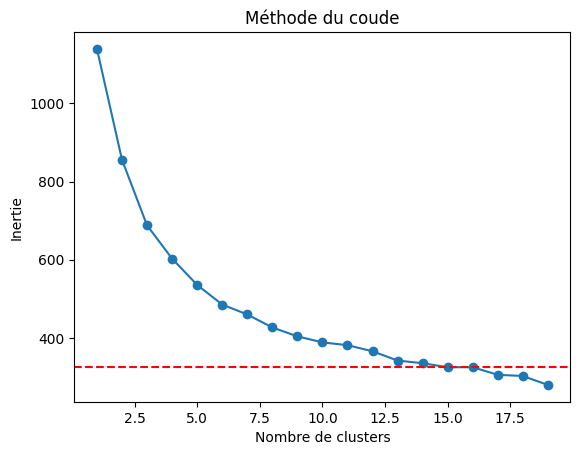

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
inertia = None
eps = 0.0005
bestk = 1
K_range = range(1, int(math.sqrt(n)))
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_final)
    inertias.append(kmeans.inertia_)
    if inertia is not None and inertia * eps > abs(inertia - kmeans.inertia_):
        bestk = k
    inertia = kmeans.inertia_

plt.plot(K_range, inertias, marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude")
plt.axhline(y=inertias[bestk - 1], color="red", linestyle="--")
plt.show()

In [28]:
bestk 

16

clustering proprement dit

In [29]:
kmeans = KMeans(n_clusters=bestk, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_final)


In [30]:
df[["cluster","fileType"]]
pivot_table = df.pivot_table(index='cluster', columns='fileType', aggfunc='size', fill_value=0)
print(pivot_table)

fileType  document  file  image  text  video
cluster                                     
0                0    95      0     0      0
1                0     0      0     0     55
2                7     0      0     0      0
3                9     0      0     0      0
4                5     0      0     0      0
5                8     0      0     0      0
6                0     0     82     0      0
7                7     0      0     0      0
8                0     0      0    23      0
9               36     0      0     0      0
10              35     0      0     0      0
11              10     0      0     0      0
12               0     0      0    23      0
13               4     0      0     0      0
14               4     0      0     0      0
15               1     0      0     0      0


In [31]:
print(df["cluster"].value_counts())

cluster
0     95
6     82
1     55
9     36
10    35
12    23
8     23
11    10
3      9
5      8
2      7
7      7
4      5
14     4
13     4
15     1
Name: count, dtype: int64


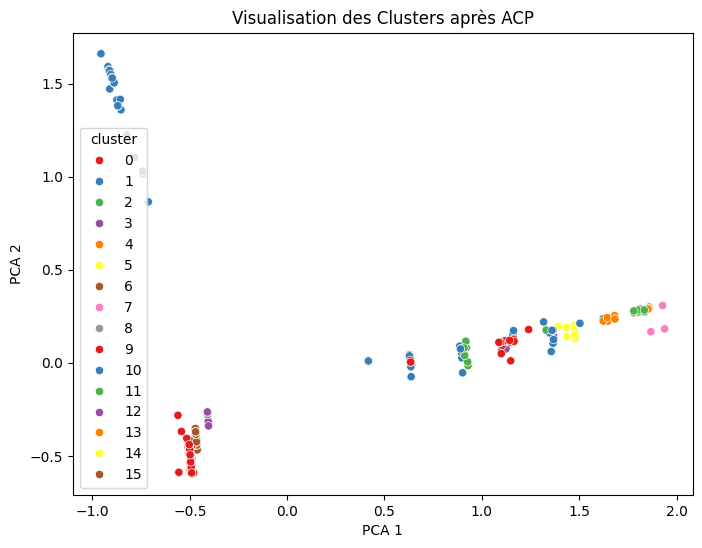

In [32]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df["cluster"], palette="Set1")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisation des Clusters après ACP")
plt.show()


On comprend ici que le clustering de fichier basée sur les métadonnées , dans le meilleur des cas avec kmeans sépare les fichiers par type de fichier

### by DBSCAN

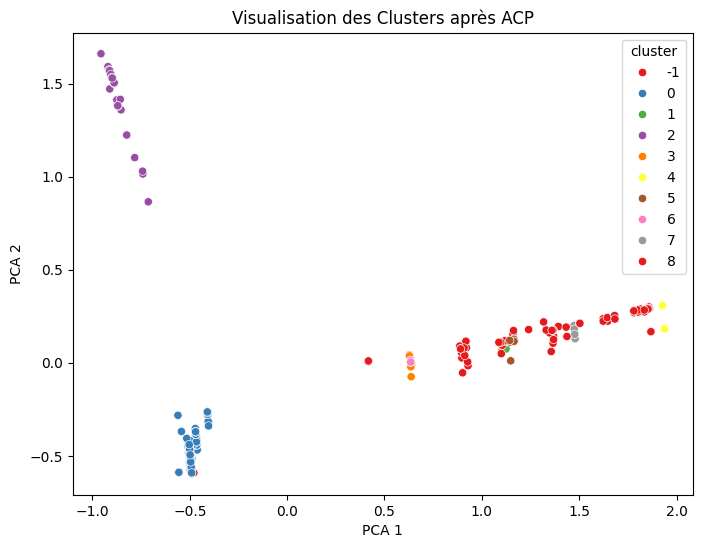

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns

# on devrait avoir minimum 5 fichier par group
dbscan = DBSCAN(eps=1.5, min_samples=5)
df["cluster"] = dbscan.fit_predict(df_final)


pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["cluster"], palette="Set1")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisation des Clusters après ACP")
plt.show()

In [36]:
df[["cluster","fileType"]]
pivot_table = df.pivot_table(index='cluster', columns='fileType', aggfunc='size', fill_value=0)
print(pivot_table)

fileType  document  file  image  text  video
cluster                                     
-1              66     0      1     0      0
 0               0    95     81    46      0
 1               7     0      0     0      0
 2               0     0      0     0     55
 3              12     0      0     0      0
 4               6     0      0     0      0
 5              12     0      0     0      0
 6               8     0      0     0      0
 7               8     0      0     0      0
 8               7     0      0     0      0
